In [1]:
import os
import sys
import inspect

# insert root dir into sys
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_dir = os.path.dirname(currentdir)
# print(root_dir)

if root_dir not in sys.path:
     sys.path.insert(0, root_dir)

##### Abstract

hw_model: Одна из реализации стадийного процесса, заданного дифференц. уравнением вида:<br>
$\begin{pmatrix}\frac{d x}{d t} \\ \frac{d y}{d t} \end{pmatrix} = \begin{pmatrix} E & Ay\\
Ax & E \end{pmatrix} \begin{pmatrix} x \\  y \end{pmatrix}$
<br>
где E, Ax, Ay - матрицы is.

Aнтагонистическая игра двух игроков A и B в распоряжении каждого из которых имеется некоторое количество единиц (units.counts) взятых (units.types) из одного множества типов для каждого игрока. Таким образом, типы едениц у А и B могут различаться, но все они берутся из одного множества.<br>
Цель игры = Цель игрока A.<br><br>
Уравнение потерь сторонами за один ход определяется как:<br>

        `x = x_prev - dt*torch.matmul(torch.mul(Ub, Ay), y_prev)`
  `(*)`
  
        `y = y_prev - dt*torch.matmul(torch.mul(Ua, Ax), x_prev)`

где `Ax, Ay` - упраляемые параметры стороны A и B соответственно,<br>
`Ub` и `Ua` матрицы эффективности для выбранных сторонами A и B типов едениц. Обе строятся из same matrix `U`.

`torch.mul` - поэлементное умножение метриц<br>
`torch.matmul` - матричное умножение матриц

Решения Ax' и Ay' принимаются игроками в начале игры и не меняются по ее ходу (as opposite to the more general seq decision problem case).

The game defined by its specification:

In [2]:
import sim5_hw_tests as smt

In [3]:
sim_spec = smt.mk_spec_for_test0()


In [4]:
sim_spec['agents']['A']['goal'] = lambda x, y: y[1] <= 0
sim_spec['agents']['B']['goal'] = lambda x, y: y[1] > 0
sim_spec['agents']

{'A': {'decision_matrix': None,
  'goal': <function __main__.<lambda>>,
  'units': {'counts': tensor([5., 5.]), 'types': [0, 1]}},
 'B': {'decision_matrix': None,
  'goal': <function __main__.<lambda>>,
  'units': {'counts': tensor([5., 5.]), 'types': [0, 1]}}}

Целевые функции игроков задаются в `sim_spec['agents']['A']['goal']` для A.<br>
Целевая функция - функция результата T итераций ур (\*) goal = goal(x, y).
Для maxmin алгоритмов pytorch и scipy берется непрерывн. функция:<br>
   `"goal": lambda x, y: y[1] <= 0`

для A и:<br>
   `"goal": lambda x, y: y[1] > 0`
   
для B. 

Т.о. интересы игроков is opposite - игра антагонистическая.

In [5]:
sim_spec['U']

tensor([[0.5000, 0.5000],
        [0.1000, 0.1000]])

### The `mcmc` solution:

In [5]:
import sim5_hw as sm
import sim5_hw_tests as smt

In [6]:
mcmc, losses = sm.run_mcmc(1500, sim_spec, mdbg=False, edbg=False)

Warmup:   0%|          | 0/3000 [00:00, ?it/s]/home/valdecar/anaconda3/envs/math/lib/python3.6/site-packages/torch/autograd/__init__.py:204: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  inputs, allow_unused)
Sample: 100%|██████████| 3000/3000 [04:20, 11.53it/s, step size=4.34e-253, acc. prob=0.394]


In [7]:
sim_spec = sm.update_spec(sim_spec, mcmc, idx=-1, side="A", dbg=False)
print("\nsolution:", sim_spec['agents']['A'])


solution: {'decision_matrix': tensor([[0.5930, 0.3186],
        [0.4070, 0.6814]]), 'units': {'types': [0, 1], 'counts': tensor([5., 5.])}, 'goal': <function <lambda> at 0x7ff9501fb9d8>}


In [8]:
smt.run_test_and_show(sim_spec, mdbg=True)

aUtypes:
[0, 1]
x0: tensor([5., 5.])
bUtypes:
[0, 1]
y0: tensor([5., 5.])
U: 
tensor([[0.5000, 0.5000],
        [0.1000, 0.1000]])
Ua=U[aUnits][bUnits].T=U[[0, 1]][[0, 1]].T:
tensor([[0.5000, 0.1000],
        [0.5000, 0.1000]])
Ub=U[bUnits][aUnits].T=U[[0, 1], [0, 1]].T:
tensor([[0.5000, 0.1000],
        [0.5000, 0.1000]])
Ax:
tensor([[0.5930, 0.3186],
        [0.4070, 0.6814]])
Ay:
tensor([[0.3027, 0.1642],
        [0.6973, 0.8358]])
x0: tensor([5., 5.])
y0: tensor([5., 5.])
x: tensor([4.5806, 3.9194])
y: tensor([4.1791, 4.3209])
-------
x: tensor([4.2290, 3.0102])
y: tensor([3.4375, 3.7213])
-------
x: tensor([3.9383, 2.2554])
y: tensor([2.7626, 3.1885])
-------
x: tensor([3.7031, 1.6406])
y: tensor([2.1428, 2.7109])
-------
x: tensor([3.5187, 1.1537])
y: tensor([1.5677, 2.2783])
-------
x: tensor([3.3814, 0.7852])
y: tensor([1.0277, 1.8810])
-------
x: tensor([3.2882, 0.5274])
y: tensor([0.5139, 1.5102])
-------
x: tensor([3.2369, 0.3747])
y: tensor([0.0180, 1.1576])
-------
x: tens

In [15]:
import matplotlib.pyplot as plt

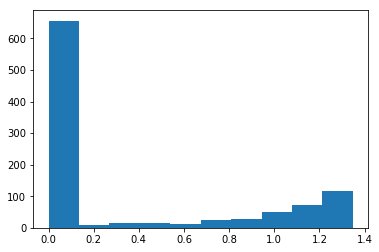

In [17]:
tests_steps=1000
losses=[]
y1s = []
for step in range(tests_steps):
    ehandler = sm.model(sim_spec, losses=losses, mdbg=False, edbg=False)
    observations = ehandler.get("observation", None)
    last_state_context = observations[1][-1]["value"]
    y1 = last_state_context["y"][1]
    y1s.append(y1.detach().clone().numpy())

plt.hist(y1s)
plt.show()


From the pic it seems that mcmc is rather working. 
The advantages of it in ability to inference in any model, no matter discrete or continuous.
It also could work with the model that have contradicting goals like the `hw_model` above without any knowledge about `maxmin` approach (as opposite to `rej.sam` implementation below).
The disadvantage is it no always converge and some times stop with some `math error` so if it could be used then only manually

Преимущество `mcmc` в том что он может выводить параметры в моделях как с непрерывной так и дискретной целевой функцией. Приведенный выше пример с `hw_model` показывает также и то, что `mcmc` может быть использована и при выводе параметров модели, в том числе содержащей несколько целевых функции с противоположными интересами, без каких либо знаний о том, что он должен искать `maxmin`.

In [ ]:
factors = run_tests_and_collect_factors(30, sim_spec)

### The rejection sampling maxmin

In [3]:
import sim5_hw1_rejsam as rejsam

with factors


init Ax, Ay:
tensor([[0.4050, 0.9846],
        [0.5950, 0.0154]])
tensor([[0.3432, 0.3636],
        [0.6568, 0.6364]])
forcing exit due to error:
max_counter excided in get_optB
the cause are: B side fail to find solution (i.e. Ay)!

mean Axs: tensor([[0.2926, 0.2910],
        [0.7074, 0.7090]])
var Axs: tensor(0.1427)

mean Ays: tensor([[0.6370, 0.7844],
        [0.3630, 0.2156]])
var Ays: tensor(0.0871)


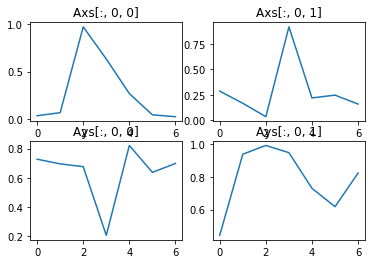

In [7]:
rejsam.test_maxmin_hw(
        30, sampler_steps=1,
        use_score=False, threshold=0.0, max_counter=3000,
        use_factors=True,
        dbg=False)


without factors


init Ax, Ay:
tensor([[0.2744, 0.3085],
        [0.7256, 0.6915]])
tensor([[0.2637, 0.2345],
        [0.7363, 0.7655]])
forcing exit due to error:
max_counter excided in get_optB
the cause are: B side fail to find solution (i.e. Ay)!

mean Axs: tensor([[0.3668, 0.1319],
        [0.6332, 0.8681]])
var Axs: tensor(0.1226)

mean Ays: tensor([[0.6726, 0.7243],
        [0.3274, 0.2757]])
var Ays: tensor(0.0885)


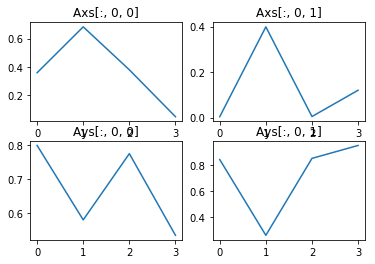

In [5]:
rejsam.test_maxmin_hw(
        30, sampler_steps=1,
        use_score=False, threshold=0.0, max_counter=3000,
        use_factors=False,
        dbg=False)


### The `pytorch` maxmin
(without factors, continues)
<br>The goalA is `torch.pow(y[1], 3)`
<br>The goalB is `torch.pow(0.5, 3)-torch.pow(y[1], 3)`

In [9]:
import sim5_hw1 as maxmin_pytorch

init Ax: tensor([[0.1449, 0.9720],
        [0.8551, 0.0280]])
init Ay: tensor([[0.3485, 0.4437],
        [0.6515, 0.5563]])


/home/valdecar/anaconda3/envs/math/lib/python3.6/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


opt progress:: █████████ 99 %
done
optimization results:
lossesA[-1]: tensor(0.)
lossesB[-1]: tensor(125.)
Ax: tensor([[-0.0100,  0.5719],
        [ 0.9900,  0.4281]], grad_fn=<DivBackward0>)
Ay: tensor([[0.2142, 0.4460],
        [0.7858, 0.5540]], grad_fn=<DivBackward0>)
x: tensor([0., 0.], grad_fn=<MaskedFillBackward0>)
y: tensor([4.7064, 0.0000], grad_fn=<MaskedFillBackward0>)


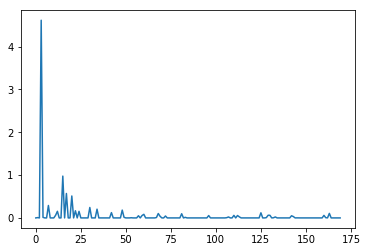

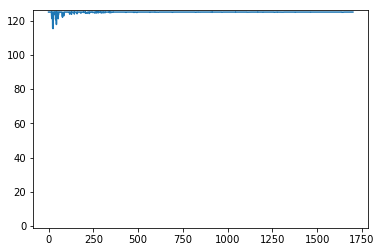

test progress:: █████████ 99 %
done
test results:
loss_max: tensor(0.1310, grad_fn=<PowBackward0>)
Ax_max: tensor([[-0.0100,  0.5719],
        [ 0.9900,  0.4281]], grad_fn=<DivBackward0>)
Ay_max: tensor([[0.7204, 0.8937],
        [0.2796, 0.1063]])
x_max: tensor([0., 0.], grad_fn=<MaskedFillBackward0>)
y_max: tensor([3.8642, 0.5079], grad_fn=<MaskedFillBackward0>)
losses<=0/losses: 0.9153846153846154


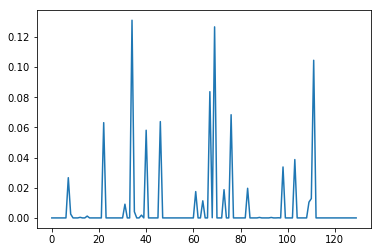

In [10]:
maxmin_pytorch.test_maxmin_hw(170, 10, 0.001, 0.001, 130, switchB_used=True, dbg=False)

### The `scipy.maxmin`
goals same as in `pytorch.maxmin` above

In [11]:
import sim5_hw1_scimaxmin as sci_maxmin

In [12]:
sci_maxmin.test_hw_diff(3, dbg=True)

model.rangesA: [(0, 1), (0, 1), (0, 1), (0, 1)]
model.rangesB: [(0, 1), (0, 1), (0, 1), (0, 1)]

init Ax, Ay:
tensor([[0.1449, 0.9720],
        [0.8551, 0.0280]])
tensor([[0.3485, 0.4437],
        [0.6515, 0.5563]])
Axt progress::  0 %
tensor([[0.4355, 0.3646],
        [0.5645, 0.6354]])
Ay
tensor([[0.9973, 0.9868],
        [0.0027, 0.0132]])

errA, errB: 0.0 112.79342651367188
Axt progress:: ███ 33 %
tensor([[0.0404, 0.1025],
        [0.9596, 0.8975]])
Ay
tensor([[0.6379, 0.8822],
        [0.3621, 0.1178]])

errA, errB: 0.0 123.43128
Axt progress:: ██████ 66 %
tensor([[0.2030, 0.1426],
        [0.7970, 0.8574]])
Ay
tensor([[0.8265, 0.5410],
        [0.1735, 0.4590]])

errA, errB: 0.0 125.0

done
lossesA[-1]: 0.0
lossesB[-1]: 125.0
Ax: tensor([[0.2030, 0.1426],
        [0.7970, 0.8574]])
Ay: tensor([[0.8265, 0.5410],
        [0.1735, 0.4590]])


In [14]:
sci_maxmin.test_hw_brute(3, dbg=True)

model.rangesA: [slice(0, 1, 0.3), slice(0, 1, 0.3), slice(0, 1, 0.3), slice(0, 1, 0.3)]
model.rangesB: [slice(0, 1, 0.3), slice(0, 1, 0.3), slice(0, 1, 0.3), slice(0, 1, 0.3)]

init Ax, Ay:
tensor([[0.1449, 0.9720],
        [0.8551, 0.0280]])
tensor([[0.3485, 0.4437],
        [0.6515, 0.5563]])
Axt progress::  0 %
tensor([[0., 0.],
        [0., 1.]])
Ay
tensor([[1., 1.],
        [0., 0.]])

errA, errB: 0.0 112.7033462524414
Axt progress:: ███ 33 %
tensor([[0., 0.],
        [1., 0.]])
Ay
tensor([[0., 0.],
        [1., 1.]])

errA, errB: 0.0 37.016204833984375
Axt progress:: ██████ 66 %
tensor([[0., 0.],
        [0., 1.]])
Ay
tensor([[1., 1.],
        [0., 0.]])

errA, errB: 0.0 114.46503448486328

done
lossesA[-1]: 0.0
lossesB[-1]: 114.46503448486328
Ax: tensor([[0., 0.],
        [0., 1.]])
Ay: tensor([[1., 1.],
        [0., 0.]])


### Summary: